In [1]:
import requests
import time
import json
from datetime import datetime
from tqdm import tqdm

In [2]:
def get_all_products():
    url = "https://api.fmarket.vn/res/products/filter"
    data = {"types":["NEW_FUND","TRADING_FUND"],"issuerIds":[],"page":1,"pageSize":1000,"fundAssetTypes":[],"bondRemainPeriods":[],"searchField":""}
    headers = {"Content-Type": "application/json; charset=utf-8"}
    x = requests.post(url, json=data, headers=headers)
    return json.loads(x.text)

def get_history(product_id):
    url = "https://api.fmarket.vn/res/product/get-nav-history"
    toDate = datetime.now().strftime("%Y%m%d")
    data = {"isAllData":1,"productId":product_id,"fromDate": None, "toDate": toDate}
    headers = {"Content-Type": "application/json; charset=utf-8"}
    x = requests.post(url, json=data, headers=headers)
    return json.loads(x.text)

In [3]:
raw_data = get_all_products()

In [4]:
histories = []
for row in tqdm(raw_data['data']['rows']):
    histories.append((row, get_history(row['id'])))
    time.sleep(0.2)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:05<00:00,  3.79it/s]


In [5]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [6]:
title = histories[1][0]['name']
data = [(d['navDate'], float(d['nav'])) for d in histories[1][1]['data']]

In [7]:
def plot_data(data, title=None):
    df = pd.DataFrame(data=data, columns=['date', 'price'])

    df['MA12'] = df['price'].rolling(12).mean()
    df['MA36'] = df['price'].rolling(36).mean()

    df.plot(x='date', figsize=(12, 5))
    plt.xlabel('date')
    plt.ylabel('price')
    plt.axis()
    plt.legend()
    plt.title(title)
    plt.show()

In [8]:
len(histories)

21

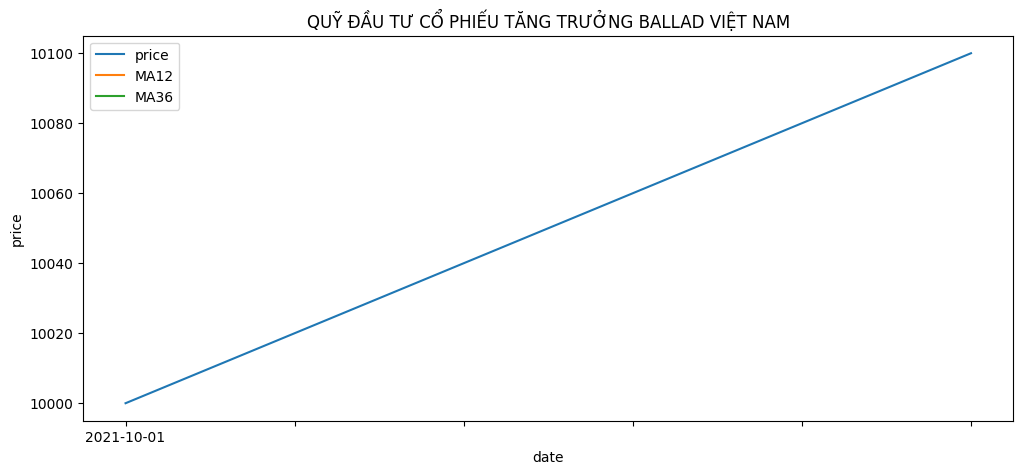

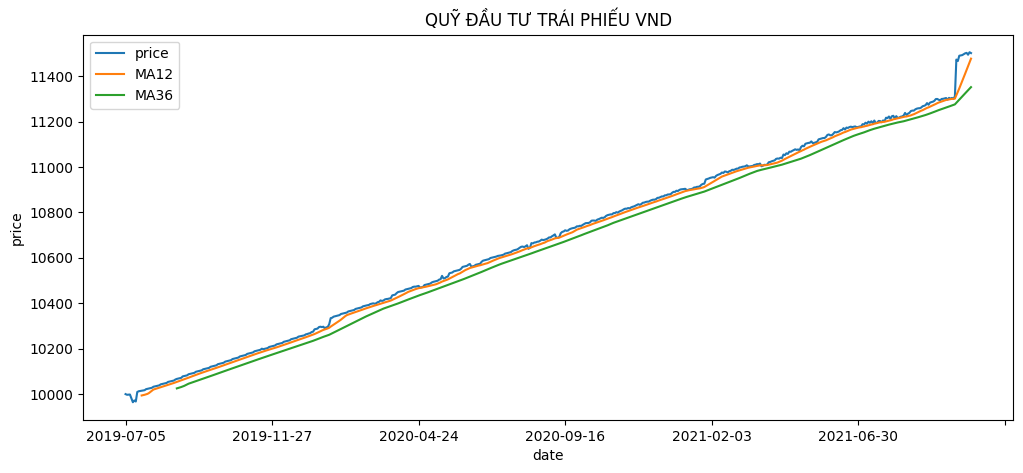

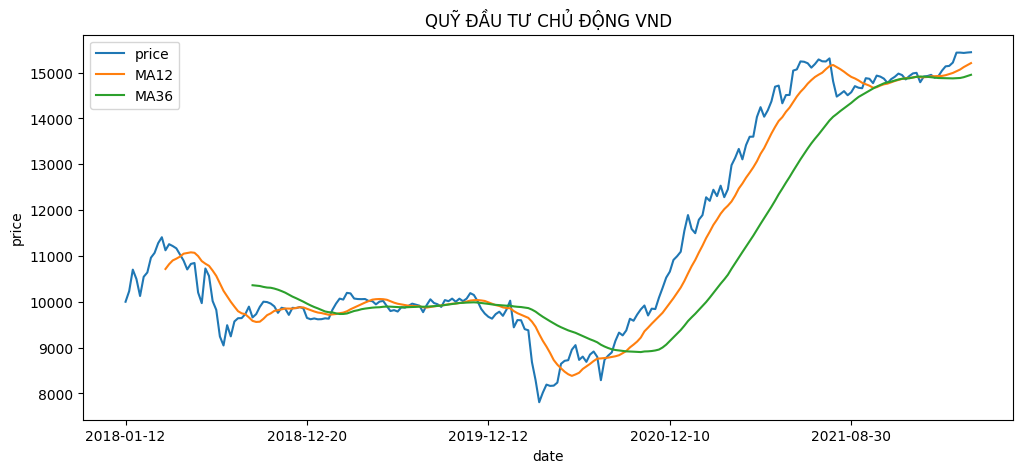

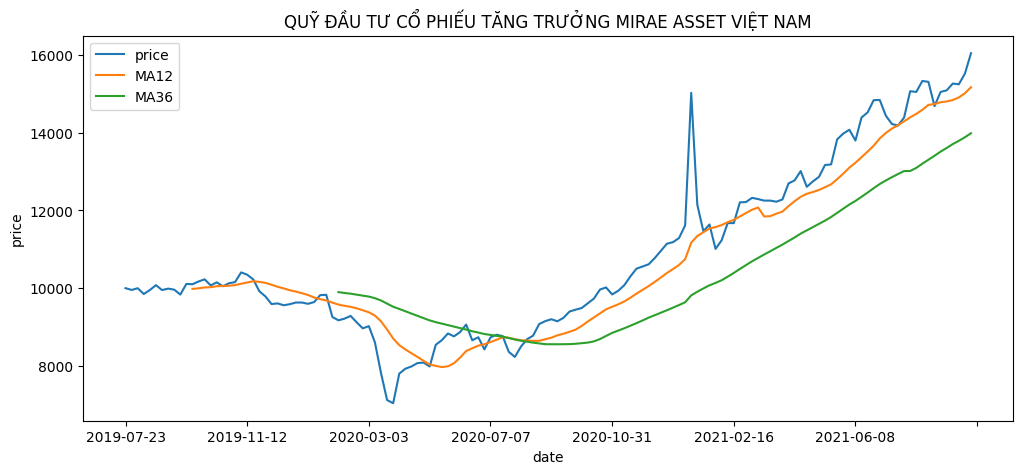

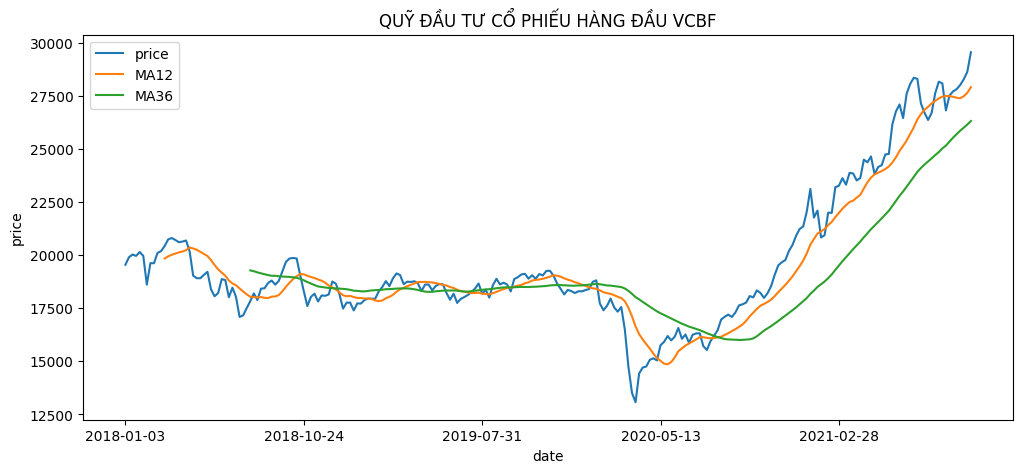

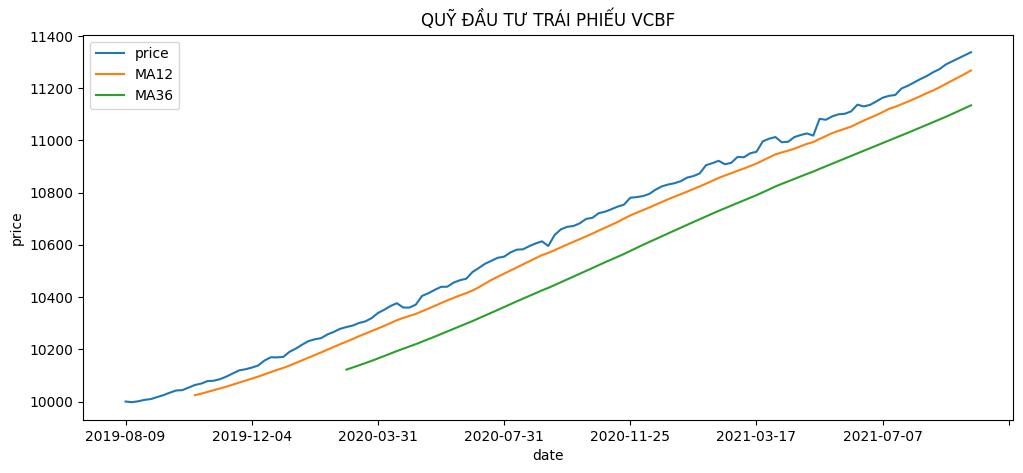

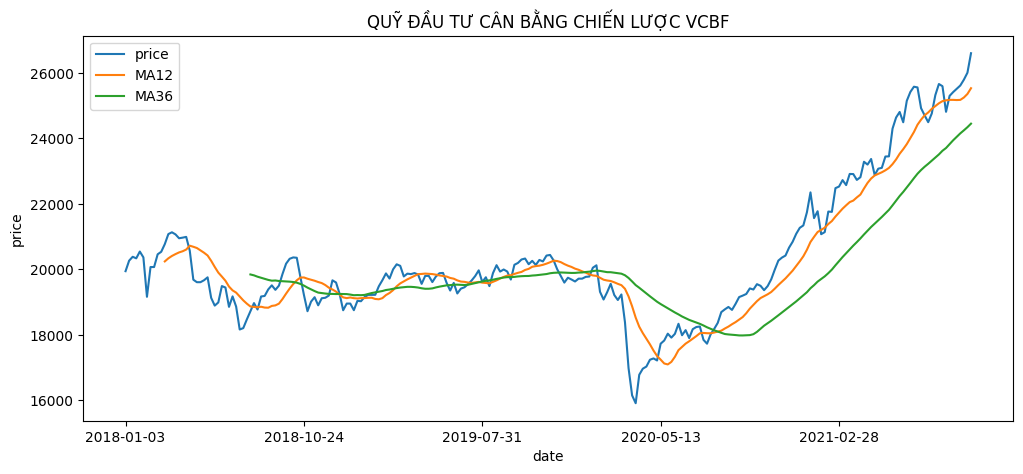

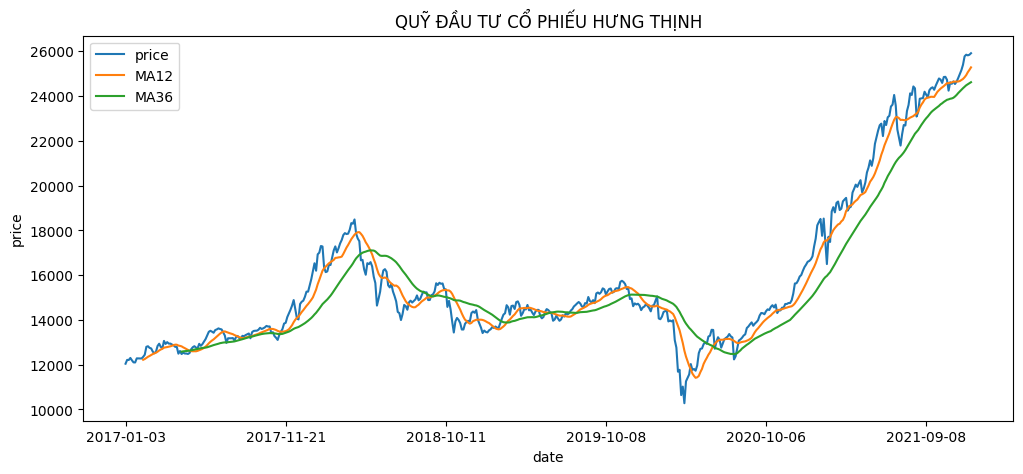

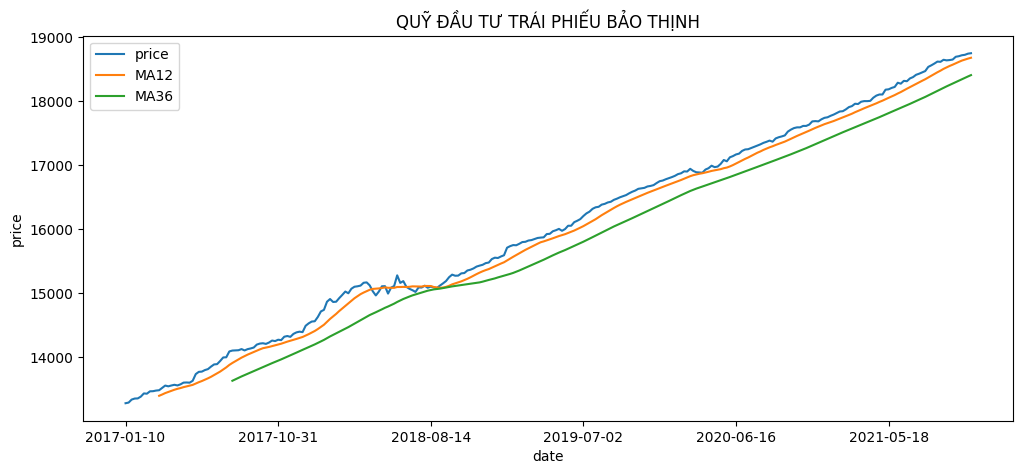

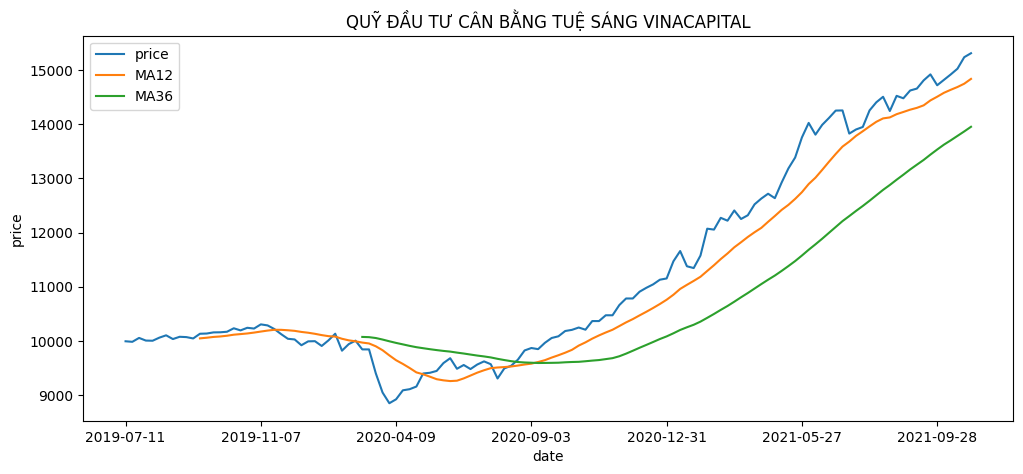

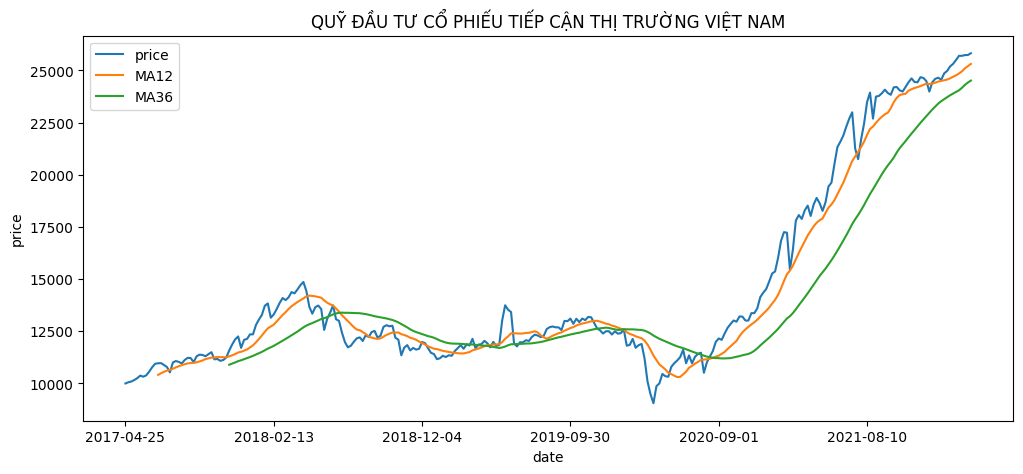

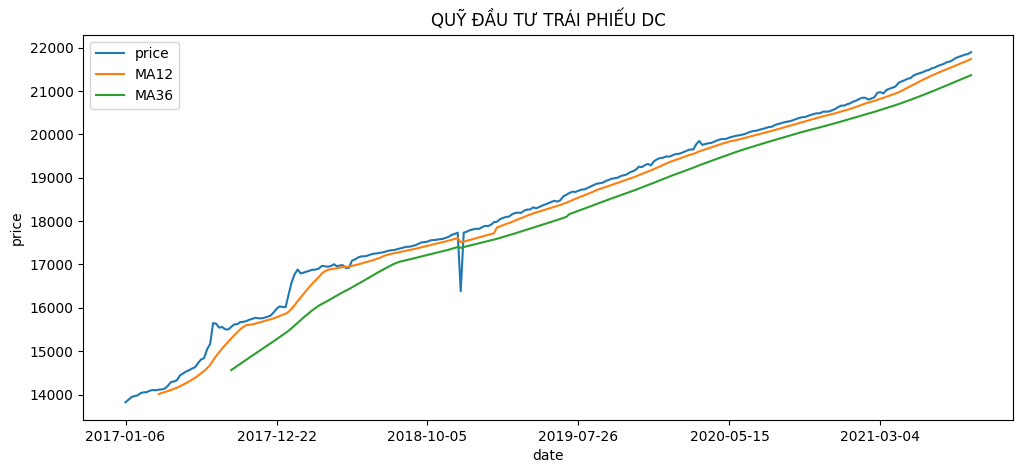

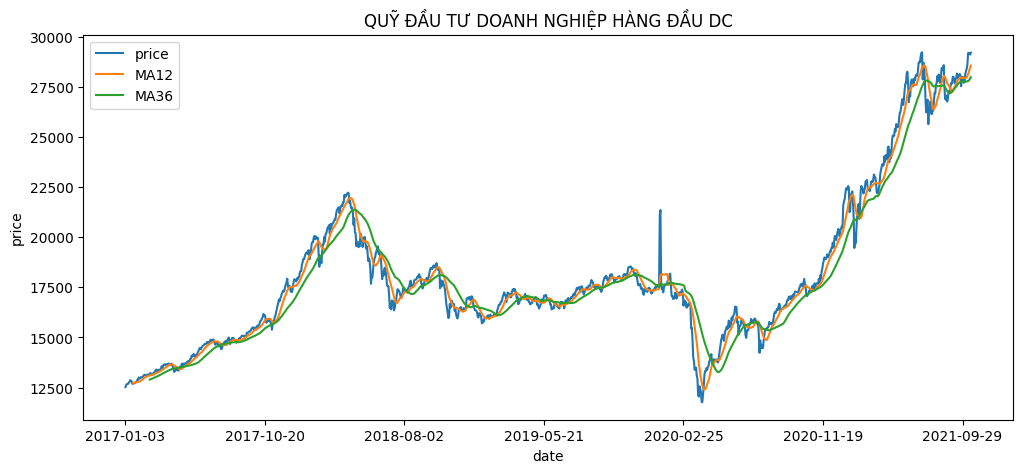

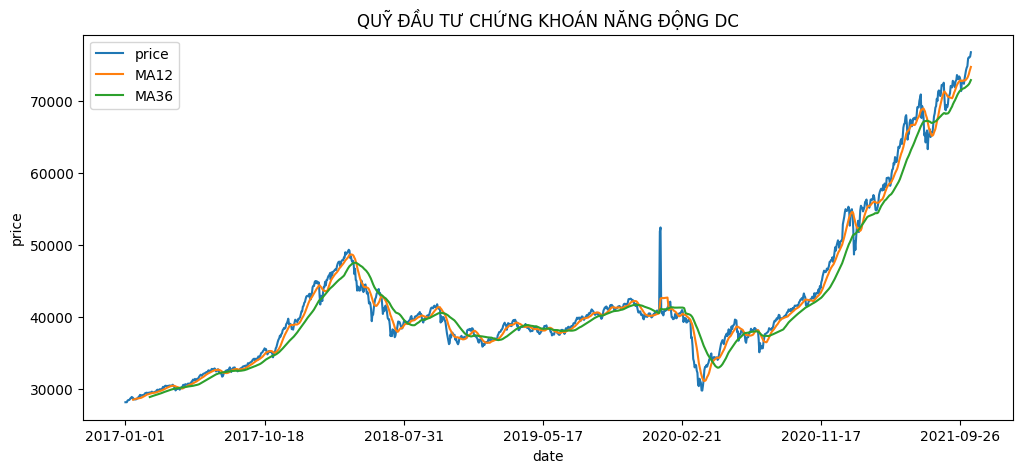

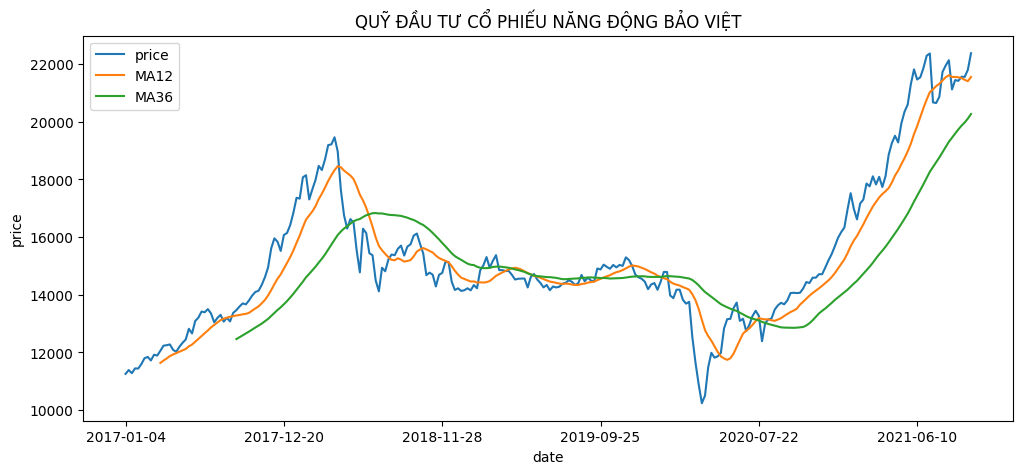

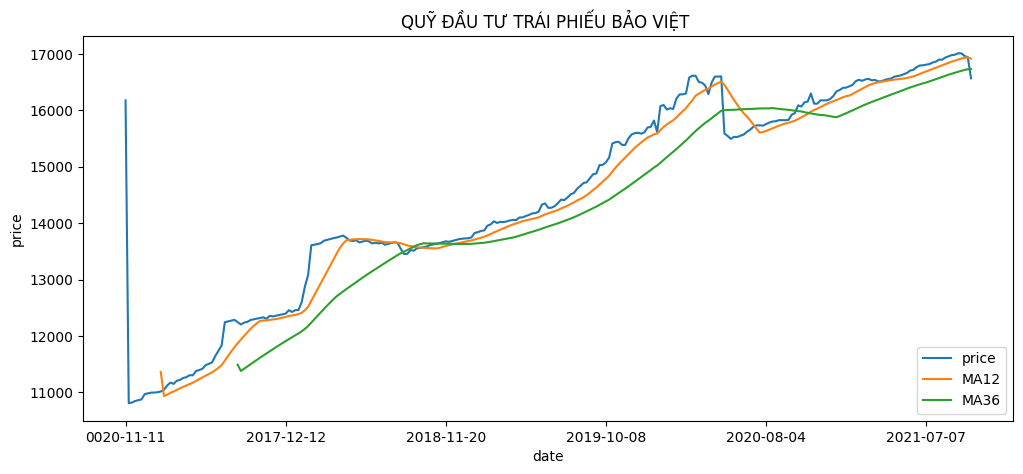

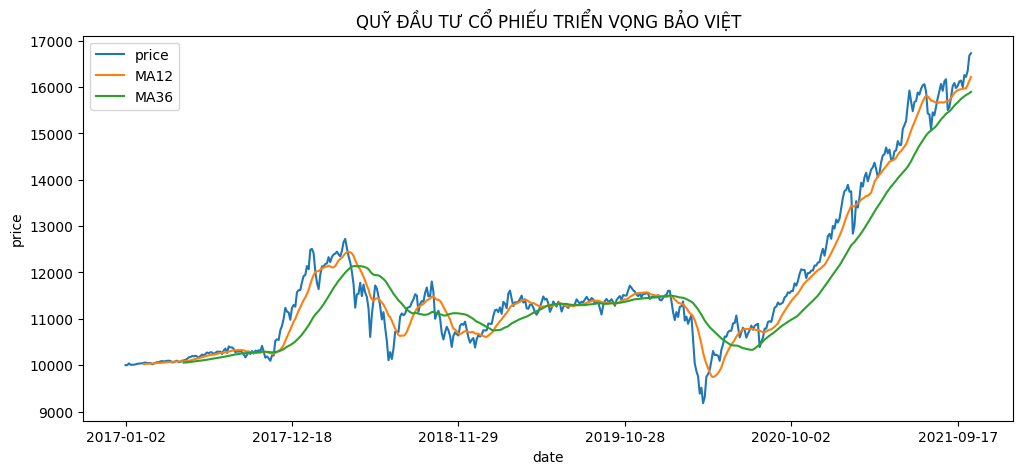

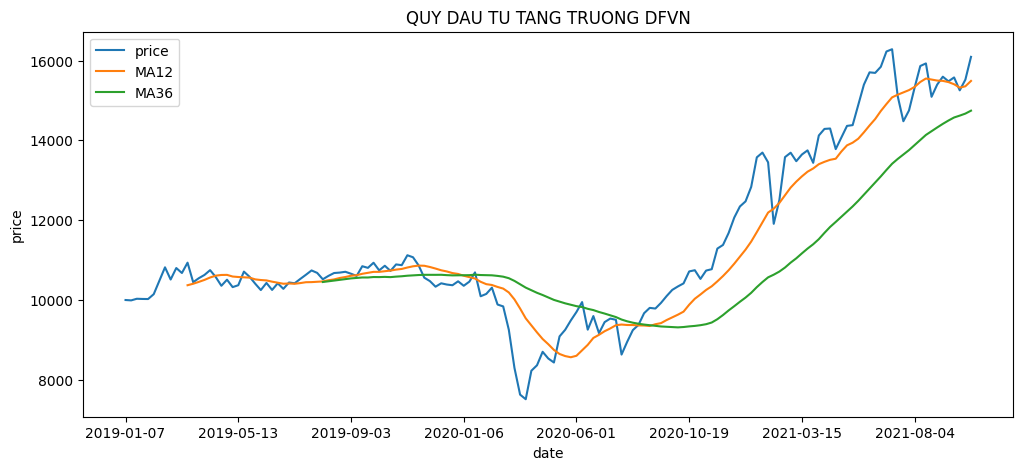

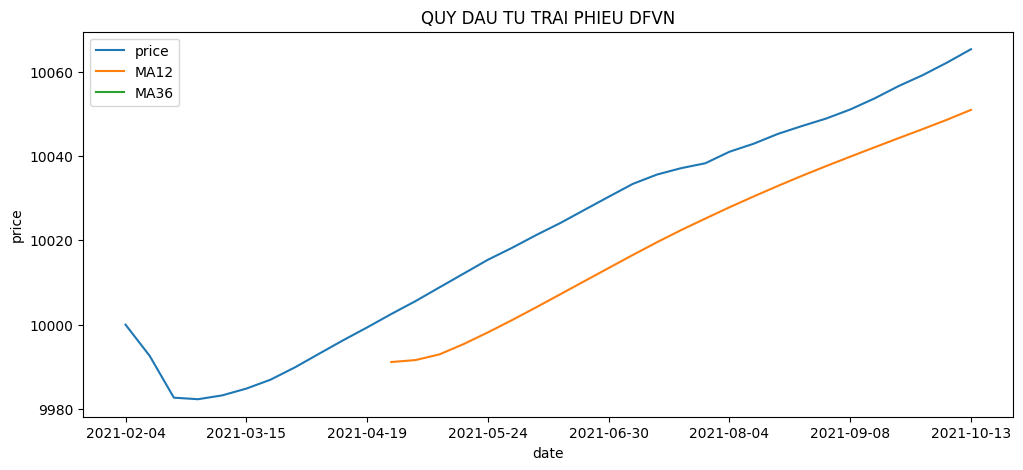

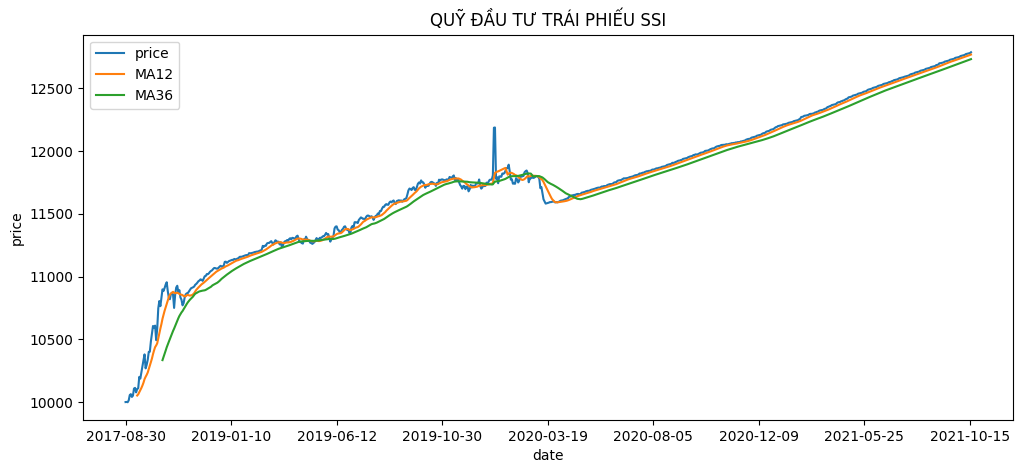

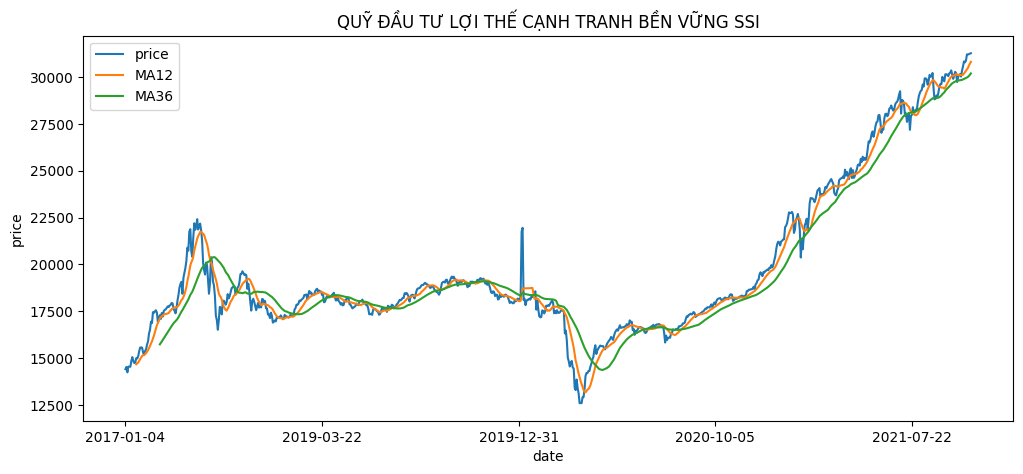

In [9]:
for info, prices in histories:
    title = info['name']
    data = [(d['navDate'], float(d['nav'])) for d in prices['data']]    
    plot_data(data, title)

In [10]:
import os

In [11]:
os.makedirs("data", exist_ok=True)

In [12]:
with open(os.path.join("data", "raw_data.json"), "w") as fp:
    json.dump(raw_data, fp)

In [13]:
for info, prices in histories:
    code = info['shortName']
    with open(os.path.join("data", f"{code}.json"), "w") as fp:
        json.dump(prices, fp)